https://www.perplexity.ai/search/c7c67e8b-1075-40c1-ab9e-69b6324a8954

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.1 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp310-cp310-macosx_10_15_x86_64.whl size=274065 sha256=94ddce0afabd103846e6c07bf7f71adfe9769d584f8ed82c363a0fc945900a6e
  Stored in directory: /Users/user/Library/Caches/pip/wheels/8d/c2/af/d591c26196f80ecdedb79664b51642ff1cf49af64d5cd69999
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [yfinance]/11 [yfinance]]oup4]


In [10]:
import yfinance as yf
ticker = '2330.TW'  # 台灣50 ETF
start_date = '2024-01-01'
end_date = '2024-06-01'

data = yf.download(ticker, start=start_date, end=end_date, interval='1d',auto_adjust=False)
data['Adj Close']['2330.TW']

[*********************100%***********************]  1 of 1 completed


Date
2024-01-02    593.0
2024-01-03    578.0
2024-01-04    580.0
2024-01-05    576.0
2024-01-08    583.0
              ...  
2024-05-27    869.0
2024-05-28    865.0
2024-05-29    857.0
2024-05-30    838.0
2024-05-31    821.0
Name: 2330.TW, Length: 98, dtype: float64

In [11]:
from pandas import DataFrame
start_date = '2024-01-01'
end_date = '2025-01-01'

tickers = ['2330.TW', '2303.TW', '2454.TW', '2317.TW']
all_data:dict[str:DataFrame]= {ticker: yf.download(ticker,start=start_date, end=end_date, interval='1d',auto_adjust=False) for ticker in tickers }

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
import pandas as pd

price_df = pd.DataFrame({key:dataframe['Adj Close'][key] for key,dataframe in all_data.items()})
price_df1 = price_df.rename(columns={'2330.TW':'台積電','2303.TW':'聯電','2454.TW':'聯發科','2317.TW':'鴻海'})
price_df1

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,593.0,51.900002,915.833191,102.375000
2024-01-03,578.0,50.599998,889.693176,101.887505
2024-01-04,580.0,50.799999,889.309814,101.400002
2024-01-05,576.0,50.799999,882.601746,101.400002
2024-01-08,583.0,50.500000,881.643433,98.962502
...,...,...,...,...
2024-12-25,1085.0,44.049999,1381.102417,186.500000
2024-12-26,1085.0,43.700001,1390.897583,187.500000
2024-12-27,1090.0,43.599998,1400.692627,186.500000


In [13]:
price_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2024-01-02 to 2024-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     242 non-null    float64
 1   聯電      242 non-null    float64
 2   聯發科     242 non-null    float64
 3   鴻海      242 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [14]:
price_df1.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,-0.148219,0.885624,0.934411
聯電,-0.148219,1.000000,-0.045245,0.044848
聯發科,0.885624,-0.045245,1.000000,0.831721
鴻海,0.934411,0.044848,0.831721,1.000000


In [17]:
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [18]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

<Axes: xlabel='Date'>

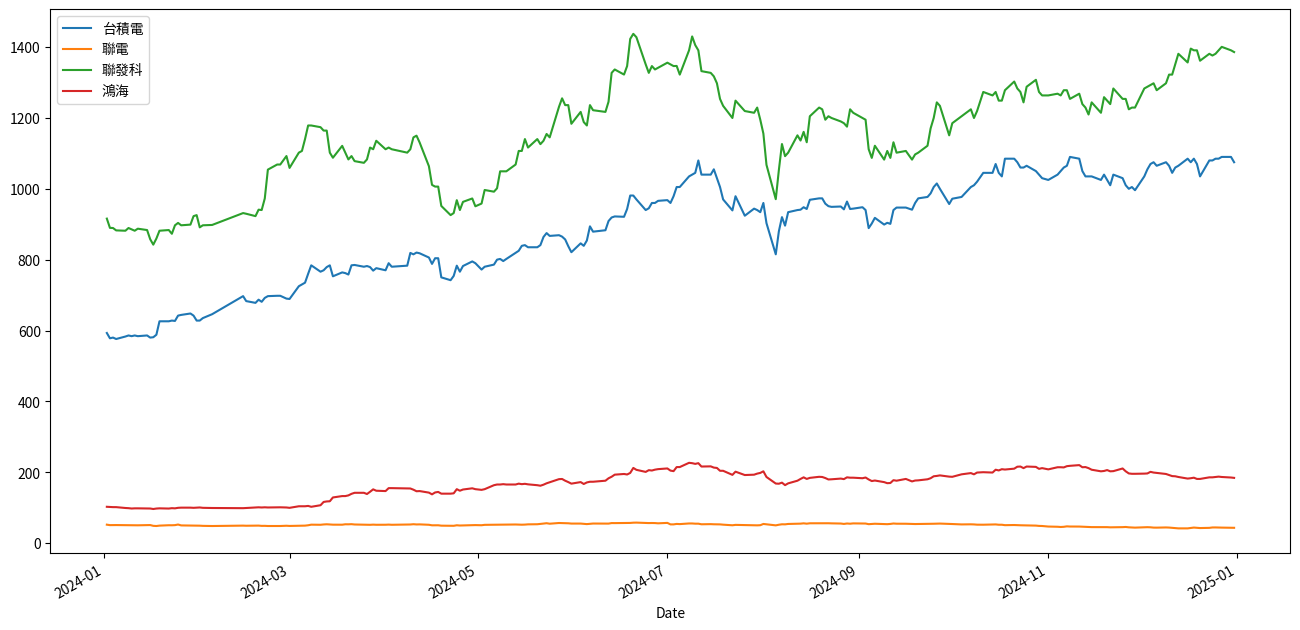

In [19]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16,8))
axes = figure.add_subplot()
price_df1.plot.line(ax=axes)